## Prédiction du taux d'attrition au sein d'une banque de détail.

### Importation des librairies

utiliser cookie cutter et github

librairie pylint pour code propre

Pour créer le fichier requirements.txt, utiliser pipreqs à la place de pip freeze. Voir pyproject.toml ou poetry

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #ces quatres lignes servent à afficher plus de 10 lignes par requète
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Importation du jeu de données

utiliser pyarrow

In [3]:
df = pd.read_csv("C:/Users/loick/Desktop/Projet Data/Quinten/Use_Case_Churn/dataset.csv", delimiter = ';')
display(df.head())

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182745,5945.077267,10803.089959,13030.928518,16070.855640,17019.439852,22021.785596,21216.423900,23817.283384,24696.468636,NaN,29133.894497,27300.071162,26686.065056,29058.920542,30081.575645,34737.732143,35668.424115,42088.923198,42764.084114,1169.512733,1476.735096,2906.612116,4238.286461,6541.289876,5604.843020,8529.610222,6698.675290,8299.637103,8584.519863,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,0.0,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,NaN,non,sms,24.10,1734.65,53.0,B1,13256.481090,13857.639282,16921.648902,15994.602590,19860.270780,21737.139931,24324.244241,27392.121666,29288.212735,31119.430165,32536.150958,33491.895175,36037.986828,37906.966495,37065.723883,36662.943135,35995.908243,38504.550415,39879.461696,40351.659648,4040.767255,2893.438448,4522.323311,3289.390612,8409.097755,5939.488953,6615.523133,8423.928612,9664.847859,12811.297554,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,0.0,non,non,3.0,oui,NaN,medium,non,non,oui,non,non,non,pro,oui,sms,73.60,232.5,41.0,B2,6485.760225,8854.292447,14631.403255,16403.253266,20053.910352,24404.311456,NaN,NaN,28995.145157,31381.332311,34524.328158,37696.137418,40010.389451,39991.336181,42066.099905,46159.092725,46548.328134,49017.799992,50879.800091,50811.414357,641.888116,2194.386006,4719.557270,5592.923372,6652.559765,11578.741807,10784.182742,10408.668590,11426.817452,11686.025962,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,1.0,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,NaN,oui,pro,oui,sms,112.90,8061.5,44.0,C4,3023.518886,3657.280381,3583.864370,7048.335851,10851.522505,13233.449469,17043.445440,17315.324866,18409.009200,20992.136261,25680.971636,26021.839063,28987.451966,28467.733523,30863.437099,NaN,35443.442964,42466.157213,47617.669527,50441.094534,846.588009,300.647893,NaN,623.554669,1411.534141,2919.154899,4837.868424,6297.571985,4694.966744,8601.779273,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,0.0,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,281,32.0,B2,5108.994106,4922.134385,5619.387384,5967.906772,11720.904970,15561.132418,14934.624990,16295.563660,18983.711353,20997.917940,23264.257596,21750.759870,19947.127129,20916.130056,21685.913416,23620.334323,24778.901653,22870.646400,25475.278671,28725.910656,533.782193,977.257244,782.571668,1830.376484,2025.910611,2696.413807,2883.741954,4206.610511,4990.114457,7081.966623,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


### Exploration préliminaire du jeu de données

In [5]:
df.shape

(7043, 63)

Le jeu de donnée comporte 7043 lignes ainsi que 63 colonnes

Jetons un oeil aux variables de notre jeu de données ainsi qu'à leur type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_client                     7043 non-null   int64  
 1   genre                         6915 non-null   object 
 2   espace_client_web             6916 non-null   float64
 3   assurance_vie                 6912 non-null   object 
 4   banque_principale             6921 non-null   object 
 5   anciennete_mois               6909 non-null   float64
 6   compte_epargne                6894 non-null   object 
 7   credit_autres                 6916 non-null   object 
 8   cartes_bancaires              6893 non-null   object 
 9   compte_courant                6896 non-null   object 
 10  espace_client                 6912 non-null   object 
 11  PEA                           6897 non-null   object 
 12  assurance_auto                6907 non-null   object 
 13  ass

Combien de valeurs uniques comporte chaque variable ?

In [7]:
df.nunique()

id_client                       7043
genre                              2
espace_client_web                  2
assurance_vie                      2
banque_principale                  2
anciennete_mois                   73
compte_epargne                     2
credit_autres                      3
cartes_bancaires                   3
compte_courant                     3
espace_client                      3
PEA                                3
assurance_auto                     3
assurance_habitation               3
credit_immo                        3
type                               2
compte_titres                      2
methode_contact                    4
agios_6mois                     1577
interet_compte_epargne_total    6411
age                               88
segment_client                    15
var_0                           6893
var_1                           6905
var_2                           6885
var_3                           6896
var_4                           6905
v

Le contenu de la colonne espace_client_web est imprécis. Remplaçons les valeurs 1.0 ou 0.0 en boolean oui ou non. (est-ce bien ce que ça veut dire ?)

In [8]:
df['espace_client_web'] = df['espace_client_web'].replace({0.0: 'Non', 1.0: 'Oui'})
df.head()

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,Non,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182745,5945.077267,10803.089959,13030.928518,16070.855640,17019.439852,22021.785596,21216.423900,23817.283384,24696.468636,NaN,29133.894497,27300.071162,26686.065056,29058.920542,30081.575645,34737.732143,35668.424115,42088.923198,42764.084114,1169.512733,1476.735096,2906.612116,4238.286461,6541.289876,5604.843020,8529.610222,6698.675290,8299.637103,8584.519863,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,Non,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,NaN,non,sms,24.10,1734.65,53.0,B1,13256.481090,13857.639282,16921.648902,15994.602590,19860.270780,21737.139931,24324.244241,27392.121666,29288.212735,31119.430165,32536.150958,33491.895175,36037.986828,37906.966495,37065.723883,36662.943135,35995.908243,38504.550415,39879.461696,40351.659648,4040.767255,2893.438448,4522.323311,3289.390612,8409.097755,5939.488953,6615.523133,8423.928612,9664.847859,12811.297554,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,Non,non,non,3.0,oui,NaN,medium,non,non,oui,non,non,non,pro,oui,sms,73.60,232.5,41.0,B2,6485.760225,8854.292447,14631.403255,16403.253266,20053.910352,24404.311456,NaN,NaN,28995.145157,31381.332311,34524.328158,37696.137418,40010.389451,39991.336181,42066.099905,46159.092725,46548.328134,49017.799992,50879.800091,50811.414357,641.888116,2194.386006,4719.557270,5592.923372,6652.559765,11578.741807,10784.182742,10408.668590,11426.817452,11686.025962,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,Oui,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,NaN,oui,pro,oui,sms,112.90,8061.5,44.0,C4,3023.518886,3657.280381,3583.864370,7048.335851,10851.522505,13233.449469,17043.445440,17315.324866,18409.009200,20992.136261,25680.971636,26021.839063,28987.451966,28467.733523,30863.437099,NaN,35443.442964,42466.157213,47617.669527,50441.094534,846.588009,300.647893,NaN,623.554669,1411.534141,2919.154899,4837.868424,6297.571985,4694.966744,8601.779273,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,Non,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,281,32.0,B2,5108.994106,4922.134385,5619.387384,5967.906772,11720.904970,15561.132418,14934.624990,16295.563660,18983.711353,20997.917940,23264.257596,21750.759870,19947.127129,20916.130056,21685.913416,23620.334323,24778.901653,22870.646400,25475.278671,28725.910656,533.782193,977.257244,782.571668,1830.376484,2025.910611,2696.413807,2883.741954,4206.610511,4990.114457,7081.966623,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


### Gestion des valeurs manquantes

In [9]:
df.isnull().sum()

id_client                          0
genre                            128
espace_client_web                127
assurance_vie                    131
banque_principale                122
anciennete_mois                  134
compte_epargne                   149
credit_autres                    127
cartes_bancaires                 150
compte_courant                   147
espace_client                    131
PEA                              146
assurance_auto                   136
assurance_habitation             139
credit_immo                      137
type                            1807
compte_titres                    130
methode_contact                  148
agios_6mois                      147
interet_compte_epargne_total     130
age                              154
segment_client                   157
var_0                            150
var_1                            138
var_2                            158
var_3                            147
var_4                            138
v

In [ ]:
#df.<the-feat>.value_counts(normalize=True)

On se rend compte que le jeu de données comporte de nombreuses valeurs manquantes que nous allons devoir traiter.

Dans un premier temps, traitons les données manquantes catégoriques. On remarque que les varibales catégoriques ont en général entre 100 et 150 valeurs manquantes, ce qui représente à peu près 2% de valeurs manquantes. Comme c'est un nombre de valeurs manquantes assez faibles, nous aurions pu supprimer les lignes concernées. Cependant, les lignes avec plus d'une valeurs manquantes sont rares, donc en choississant cette méthode, beaucoup trop de lignes auraient été supprimées. Nous allons donc remplacer les valeurs vides par la mention "Valeur manquante".

Dans le dataset, la colonne "intéret comptes épargne" est de type object alors qu'elle devrait être de type float. Changeons cela.

In [39]:
df['interet_compte_epargne_total'] = pd.to_numeric(df['interet_compte_epargne_total'], errors='coerce')

In [40]:
for col in df.select_dtypes(include=['category','object']).columns:
    df[col] = df[col].apply(lambda x: x if pd.notnull(x) else "Valeurs manquantes")
df.head()

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,Non,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182745,5945.077267,10803.089959,13030.928518,16070.855640,17019.439852,22021.785596,21216.423900,23817.283384,24696.468636,NaN,29133.894497,27300.071162,26686.065056,29058.920542,30081.575645,34737.732143,35668.424115,42088.923198,42764.084114,1169.512733,1476.735096,2906.612116,4238.286461,6541.289876,5604.843020,8529.610222,6698.675290,8299.637103,8584.519863,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,Non,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,Valeurs manquantes,non,sms,24.10,1734.65,53.0,B1,13256.481090,13857.639282,16921.648902,15994.602590,19860.270780,21737.139931,24324.244241,27392.121666,29288.212735,31119.430165,32536.150958,33491.895175,36037.986828,37906.966495,37065.723883,36662.943135,35995.908243,38504.550415,39879.461696,40351.659648,4040.767255,2893.438448,4522.323311,3289.390612,8409.097755,5939.488953,6615.523133,8423.928612,9664.847859,12811.297554,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,Non,non,non,3.0,oui,Valeurs manquantes,medium,non,non,oui,non,non,non,pro,oui,sms,73.60,232.50,41.0,B2,6485.760225,8854.292447,14631.403255,16403.253266,20053.910352,24404.311456,NaN,NaN,28995.145157,31381.332311,34524.328158,37696.137418,40010.389451,39991.336181,42066.099905,46159.092725,46548.328134,49017.799992,50879.800091,50811.414357,641.888116,2194.386006,4719.557270,5592.923372,6652.559765,11578.741807,10784.182742,10408.668590,11426.817452,11686.025962,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,Oui,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,Valeurs manquantes,oui,pro,oui,sms,112.90,8061.50,44.0,C4,3023.518886,3657.280381,3583.864370,7048.335851,10851.522505,13233.449469,17043.445440,17315.324866,18409.009200,20992.136261,25680.971636,26021.839063,28987.451966,28467.733523,30863.437099,NaN,35443.442964,42466.157213,47617.669527,50441.094534,846.588009,300.647893,NaN,623.554669,1411.534141,2919.154899,4837.868424,6297.571985,4694.966744,8601.779273,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,Non,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,281.00,32.0,B2,5108.994106,4922.134385,5619.387384,5967.906772,11720.904970,15561.132418,14934.624990,16295.563660,18983.711353,20997.917940,23264.257596,21750.759870,19947.127129,20916.130056,21685.913416,23620.334323,24778.901653,22870.646400,25475.278671,28725.910656,533.782193,977.257244,782.571668,1830.376484,2025.910611,2696.413807,2883.741954,4206.610511,4990.114457,7081.966623,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


Maintenant, traitons les valeurs manquantes des variables numériques. Ici aussi, les valeurs manquantes représentent environ 2% des lignes. Nous allons donc remplacer les valeurs manquantes par le mode de chaque colonne, afin de ne pas biaiser le modèle mais de pouvoir quand même sortir des statistiques.

In [41]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [42]:
df.isnull().sum()

id_client                       0
genre                           0
espace_client_web               0
assurance_vie                   0
banque_principale               0
anciennete_mois                 0
compte_epargne                  0
credit_autres                   0
cartes_bancaires                0
compte_courant                  0
espace_client                   0
PEA                             0
assurance_auto                  0
assurance_habitation            0
credit_immo                     0
type                            0
compte_titres                   0
methode_contact                 0
agios_6mois                     0
interet_compte_epargne_total    0
age                             0
segment_client                  0
var_0                           0
var_1                           0
var_2                           0
var_3                           0
var_4                           0
var_5                           0
var_6                           0
var_7         

Toutes les valeurs manquantes sont traitées, nous pouvons passer à la suite.

### Traitement des outliers

IQR, Z scor et librairie PyOd

Encodage des variables catégorielles

ACP

## Exploratory Data Analysis et statistiques

utiliser PYGwalker ou dtale

Jetons un oeil aux statistiques globales de notre jeu de donnéee.

In [43]:
df.describe()

,id_client,anciennete_mois,agios_6mois,interet_compte_epargne_total,age,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,31.781911,63.828404,2239.367223,43.507738,7027.085881,8918.176185,10886.216137,12824.755321,14822.268501,16786.528476,18759.689905,20714.939382,22715.753065,24548.132038,26624.514745,28607.442568,30622.590112,32516.562127,34495.781716,36393.311342,38392.737039,40562.082778,42373.478480,44479.857888,1793.902933,2343.572383,2979.453043,3673.977038,4477.766287,5334.963479,6261.420237,7308.633735,8412.481880,9585.525293,10823.929302,12184.301881,13563.863505,15048.107625,16631.097745,18337.099047,20027.825137,21845.714356,23762.608382
std,2033.283305,24.712763,30.464238,2266.760899,16.050953,5840.705163,6363.641090,6762.428251,7117.663147,7522.984472,7781.084304,8041.588409,8326.924909,8697.366609,9175.762060,9266.599600,9524.100100,9660.808317,9973.299688,10175.329620,10558.067810,10720.054134,10731.632341,11153.046894,11182.839807,1975.162790,2319.614019,2681.762230,3013.256604,3404.420104,3797.644372,4200.957930,4736.601203,5201.438262,5672.050381,6197.563439,6722.964549,7243.613883,7784.831549,8302.110332,8916.115570,9452.169808,10155.247112,10780.068546
min,0.000000,0.000000,18.250000,18.800000,20.000000,0.767658,-4241.785944,-3519.347763,-3913.768064,-5409.713059,-3465.351758,-2841.348341,-904.308834,-2149.031436,-4337.062922,-5.206176,650.647378,3358.080715,3326.158824,6544.063228,6506.306202,7606.828103,9048.149110,12050.195361,12959.846404,1.194554,-90.450206,-111.756762,-50.767485,-33.384666,-206.422219,-25.344010,17.175309,-21.541673,-11.430930,31.496118,51.786562,258.614091,474.166678,1050.553067,1401.075175,1704.972375,1924.631757,2703.861155
25%,1760.500000,8.000000,29.850000,355.100000,31.000000,2532.365774,4497.717872,6381.898999,8171.672230,10137.835361,11859.473669,13696.494169,15381.145770,17384.461469,19121.332217,20981.329126,22848.325917,24611.163925,26330.518084,28235.067690,30002.815989,31923.803838,33963.605795,35678.184063,37522.267777,524.477144,826.603531,1210.441343,1644.162812,2177.813584,2727.909022,3322.400376,4042.318631,4857.562142,5687.103867,6582.426954,7534.206147,8579.146294,9619.290338,10897.442152,12225.834422,13510.951296,14940.987804,16314.474761
50%,3521.000000,28.000000,69.950000,1348.950000,39.000000,5645.237925,7791.946955,9916.277240,12078.661625,14214.591000,16123.191144,18258.990010,20312.654250,22423.961253,24423.986706,26527.593587,28512.933080,30510.910252,32453.697486,34436.164658,36403.740673,38352.243469,40506.907628,42374.146818,44549.019806,1127.614846,1635.527874,2212.832174,2907.716022,3672.391966,4478.847879,5395.068108,6440.416715,7423.349463,8661.188475,9844.800316,11215.386653,12524.408513,14002.800259,15485.533261,17189.313559,18956.726695,20635.030414,22505.599161
75%,5281.500000,55.000000,89.650000,3727.875000,54.000000,10008.571304,12341.044443,14635.981274,16852.375782,19196.219736,21466.415448,23667.939667,25835.475694,28029.975103,30056.715627,32293.574139,34386.658909,36669.989658,38821.910933,40993.349547,43152.633821,45178.413678,47412.518483,49513.451664,51525.124979,2337.560928,3094.962862,3905.222575,4834.288069,5886.452895,7032.257877,8305.298517,9575.176765,10963.941606,12409.423921,13

Dans un premier temps, scindons notre jeu de données en deux populations, les clients churneurs et les clients actuels de la banque.

In [44]:
attrition = df.loc[df["churn"]=="oui"] #les clients churneurs
not_churn = df.loc[df["churn"]=="non"] #les autres clients

Nous avons maintenant accès aux statistiques de chaque population, les clients churneurs et les autres.

In [45]:
attrition.describe()

,id_client,anciennete_mois,agios_6mois,interet_compte_epargne_total,age,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,3555.795078,17.597646,73.330257,1489.140663,35.224719,4408.807402,6322.264413,8346.884555,10343.865702,12211.749509,14157.256126,16136.329491,18012.681179,19996.189108,21858.174617,23967.161508,25898.624009,27843.205519,29827.274127,31894.330428,33779.659321,35875.216572,38145.093714,39725.262335,41905.206588,987.054046,1449.477594,2008.445707,2604.398032,3327.800505,4052.694883,4889.777959,5778.985096,6690.679761,7744.899579,8947.096694,10262.377665,11525.801952,12878.667101,14431.370962,15912.953957,17543.901484,19327.253442,21122.654366
std,2037.765072,19.387840,25.639293,1880.509893,11.369820,3350.606727,4167.750347,4729.039723,5087.354426,5708.039291,6066.706955,6400.693737,6756.288619,7052.625188,7703.266609,7834.214955,8244.690698,8354.499286,8799.350941,8931.602239,9212.446959,9359.337987,9256.658559,9961.259930,9883.654456,852.094363,1155.396829,1466.336301,1760.845170,2062.242065,2471.092741,2818.079675,3226.729388,3609.740172,4065.885390,4620.947103,5044.120925,5594.231787,6101.639924,6569.304101,7166.112015,7666.609673,8305.426379,8844.195172
min,2.000000,1.000000,18.850000,18.850000,20.000000,0.767658,-4241.785944,-3519.347763,-3913.768064,-5409.713059,-3465.351758,-2841.348341,-904.308834,-2149.031436,-4337.062922,-5.206176,650.647378,3358.080715,3326.158824,6544.063228,6506.306202,7606.828103,9048.149110,12050.195361,12959.846404,1.194554,-90.450206,-111.756762,-50.767485,-33.384666,-206.422219,-25.344010,17.175309,-21.541673,-11.430930,31.496118,51.786562,258.614091,474.166678,1050.553067,1401.075175,1704.972375,1924.631757,2703.861155
25%,1790.000000,2.000000,55.000000,99.750000,27.000000,1706.079561,3545.851618,5368.888500,7151.876382,8896.723780,10765.801497,12308.867374,13936.276185,15941.778068,17859.659767,19363.445900,21178.947458,22606.105087,24559.979972,26659.489002,28313.751773,30332.967793,32162.743454,33703.468392,35738.585339,384.765022,633.640382,980.080660,1368.343408,1888.224780,2361.439821,2871.773367,3496.129175,4154.160982,4934.737064,5732.304242,6732.343574,7578.466538,8567.323288,9847.806629,10902.699959,12081.278512,13572.569826,15022.275807
50%,3580.000000,9.000000,79.350000,655.850000,33.000000,3785.791189,5936.549727,8173.507949,10101.993032,12270.794544,14238.390195,16219.907267,18229.149393,20082.109585,22155.898257,24192.917311,26198.400302,27973.857993,30022.461606,32032.327943,34055.626867,36140.016801,38227.665098,39943.445705,42043.832029,767.593452,1176.367288,1704.292526,2270.596306,2922.037679,3671.433814,4535.300972,5312.496201,6161.922045,7315.016485,8373.936967,9751.162774,10895.097961,12228.757912,13671.807968,15206.906063,16642.220576,18415.422595,20224.910093
75%,5345.000000,28.000000,94.100000,2264.050000,40.000000,6470.850667,8886.318361,11186.632513,13542.652379,15712.160172,17961.549056,20122.996346,22449.027023,24635.922339,26839.230336,28942.148663,31217.743870,33284.508084,35575.138700,37796.701074,39812.182992,41945.695707,44296.157289,46392.473623,48285.169853,1343.587499,1978.156961,2663.333138,3474.571381,4391.371476,5443.040116,6477.835728,7591.959950,8814.370211,10068.511264,11630.339764,13297.795833

In [46]:
not_churn.describe()

,id_client,anciennete_mois,agios_6mois,interet_compte_epargne_total,age,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,3508.431001,36.905682,60.396057,2510.370980,46.499807,7972.884581,9855.895378,11803.496911,13720.925150,15765.264248,17736.298484,19707.324349,21691.074013,23698.139040,25519.823268,27584.428390,29585.946991,31626.585049,33488.011542,35435.501943,37337.438830,39302.139001,41435.169860,43330.091540,45409.897177,2085.360329,2666.545549,3330.209268,4060.340231,4893.167533,5798.156368,6756.897511,7861.187524,9034.447122,10250.413089,11501.896086,12878.557072,14300.070896,15831.772941,17425.703342,19212.771095,20925.090948,22755.456035,24716.236920
std,2031.712630,24.427218,31.330433,2332.560454,16.440565,6246.087199,6748.363939,7141.834457,7522.772211,7869.312641,8107.393280,8357.785130,8620.583743,9020.847242,9467.166067,9552.947068,9763.527882,9901.925794,10192.503186,10431.214878,10850.871710,11031.363562,11088.882324,11404.042460,11476.199512,2174.496483,2539.568224,2924.059109,3267.711893,3686.658773,4076.657144,4497.913807,5062.684145,5537.741331,6013.328972,6545.537752,7108.025123,7621.252596,8169.514188,8709.995497,9315.863473,9867.327473,10600.046005,11248.252161
min,0.000000,0.000000,18.250000,18.800000,20.000000,0.767658,-4241.785944,-3519.347763,-3913.768064,-5409.713059,-3465.351758,-2841.348341,-904.308834,-2149.031436,-4337.062922,-5.206176,650.647378,3358.080715,3326.158824,6544.063228,6506.306202,7606.828103,9048.149110,12050.195361,12959.846404,1.194554,-90.450206,-111.756762,-50.767485,-33.384666,-206.422219,-25.344010,17.175309,-21.541673,-11.430930,31.496118,51.786562,258.614091,474.166678,1050.553067,1401.075175,1704.972375,1924.631757,2703.861155
25%,1753.250000,13.000000,24.700000,533.675000,34.000000,3016.633816,5036.037971,6867.223375,8737.955030,10667.763703,12433.694090,14310.837415,16159.971422,18131.984498,19821.395846,21680.615298,23649.729286,25443.341432,27199.493038,29008.316819,30859.266634,32644.783027,34655.364023,36528.338935,38381.097394,589.505987,942.368003,1333.612122,1798.061400,2333.259388,2958.621826,3587.292232,4343.897513,5211.540619,6045.955808,6938.075038,8003.756564,9068.476700,10194.745510,11415.228641,12828.858711,14047.605529,15539.283348,16964.798625
50%,3501.500000,37.000000,62.800000,1640.650000,44.000000,6677.100058,8753.675341,10893.414023,12977.435730,15151.550123,17207.125360,19164.186693,21257.777596,23411.470136,25506.222943,27515.321623,29436.947621,31450.180326,33441.832166,35369.060148,37295.381934,39425.942920,41470.911131,43341.153168,45406.991686,1370.249815,1888.067625,2536.986987,3245.522421,4033.121243,4892.265835,5830.546025,6940.026278,8018.414821,9303.247507,10527.801137,11794.439539,13210.431985,14657.765456,16277.624948,18006.420370,19789.807209,21513.337102,23427.563270
75%,5254.750000,60.000000,87.187500,4198.537500,57.000000,11507.626993,13794.450525,16044.095046,18230.350633,20623.873994,22801.570528,24957.503922,27054.123354,29431.114444,31388.967871,33542.182472,35579.001379,37836.417248,39980.269016,42325.923273,44244.045117,46325.396297,48422.754824,50713.678222,52836.649467,2795.233958,3609.735554,4486.227263,5376.129835,6554.481284,7687.455142,9076.710290,10302.023366,11891.793472,13376.55

Illustrons les différences entre ces deux populations, en nous concentrant dans un premier temps sur les varibales numériques qui semblent corrélées avec le taux de churn à première vue.

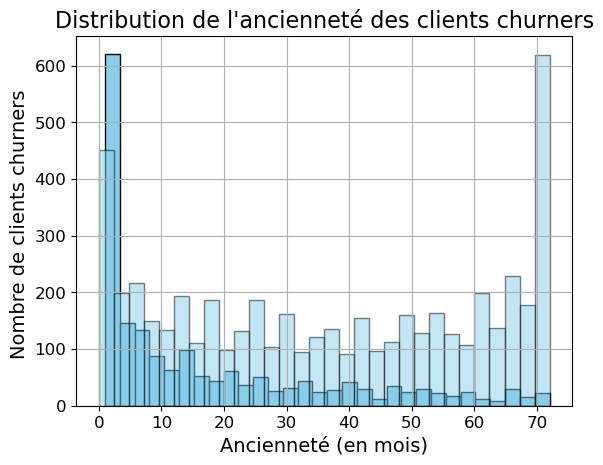

In [47]:
plt.hist(attrition["anciennete_mois"], bins=30, color='skyblue', edgecolor='black', label = 'churn') #histogramme de la répartition des clients churners en fonction de leur ancienneté en tant que client de la banque
plt.hist(not_churn["anciennete_mois"], bins=30, color='skyblue', edgecolor='black', alpha = 0.5, label = 'No Churn') #histogramme de la répartition des clients non churners en fonction de leur ancienneté en tant que client de la banque

plt.title('Distribution de l\'ancienneté des clients churners', fontsize=16)
plt.xlabel('Ancienneté (en mois)', fontsize=14)
plt.ylabel('Nombre de clients churners ', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

On déduit de cet histogramme que les churners ont en majorité très peu d'ancienneté en tant que client de la banque. Ils sont même plus nombreux que les non churners entre 0 et 5 mois d'ancienneté.

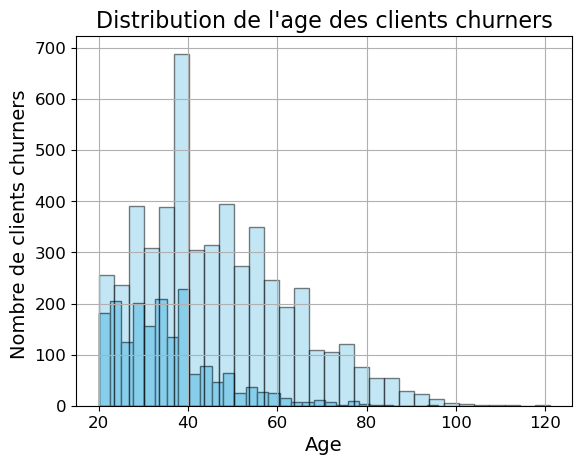

In [48]:
plt.hist(attrition["age"], bins=30, color='skyblue', edgecolor='black') #histogramme de la répartition des clients churners en fonction de leur âge
plt.hist(not_churn["age"], bins=30, color='skyblue', alpha = 0.5, edgecolor='black') #histogramme de la répartition des clients non churners en fonction de leur âge

# Ajouter des titres et des étiquettes
plt.title('Distribution de l\'age des clients churners', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Nombre de clients churners ', fontsize=14)

# Améliorer les axes
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

On déduit de cet histogramme que les churners sont en majorité plutôt jeunes.

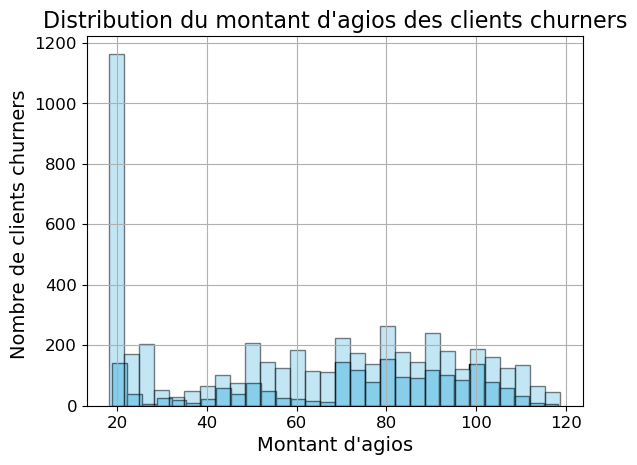

In [49]:
plt.hist(attrition["agios_6mois"], bins=30, color='skyblue', edgecolor='black') #histogramme de la répartition des clients churners en fonction de leur montant d'agios
plt.hist(not_churn["agios_6mois"], bins=30, color='skyblue', alpha = 0.5, edgecolor='black') #histogramme de la répartition des clients non churners en fonction de leur montant d'agios

# Ajouter des titres et des étiquettes
plt.title('Distribution du montant d\'agios des clients churners', fontsize=16)
plt.xlabel('Montant d\'agios', fontsize=14)
plt.ylabel('Nombre de clients churners ', fontsize=14)

# Améliorer les axes
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

La répartition des montant d'agios des churners est beaucoup plus uniforme que celle des non churners, donc les churners ont davantage été à découvert lors des 6 derniers mois.

Gestion des variables qualitatives

Jetons un oeil à la répartition des segments clients chez nos poupulations

In [50]:
values = attrition["segment_client"].value_counts().sort_values(ascending=False)

# Convertir en pourcentage
percentage = values / values.sum() * 100

# Afficher les résultats
print(percentage)

D1                    7.276619
B4                    6.848582
A3                    6.741573
C1                    6.634564
B2                    6.581059
A2                    6.581059
B3                    6.581059
C4                    6.581059
A4                    6.581059
D2                    6.581059
A1                    6.527555
D3                    6.474050
C2                    6.313537
B1                    6.099518
C3                    5.671482
Valeurs manquantes    1.926164
Name: segment_client, dtype: float64


In [51]:

values = not_churn["segment_client"].value_counts().sort_values(ascending=False)

# Convertir en pourcentage
percentage = values / values.sum() * 100

# Afficher les résultats
print(percentage)

B2                    11.538462
A1                    11.422497
C1                    11.287205
D1                    11.113259
B1                    10.958639
C4                    10.668728
C2                    10.301508
C3                    10.282180
A4                    10.088906
Valeurs manquantes     2.338616
Name: segment_client, dtype: float64


Rien de spécialement significatif. On remarque tout de même que les segments A2, A3, B3, B4, D2 et D3 n'existent que dans la populations des churners

In [52]:
values = not_churn["banque_principale"].value_counts().sort_values(ascending=False)
percentage = (values / values.sum()) * 100
print(percentage)

non                   64.514882
oui                   33.726324
Valeurs manquantes     1.758794
Name: banque_principale, dtype: float64


In [53]:
values = attrition["banque_principale"].value_counts().sort_values(ascending=False)
percentage = (values / values.sum()) * 100
print(percentage)

non                   81.112895
oui                   17.228464
Valeurs manquantes     1.658641
Name: banque_principale, dtype: float64


La banque est davantage la banque principale des non churners que des churners.

In [54]:
values = attrition["compte_epargne"].value_counts().sort_values(ascending=False)
percentage = (values / values.sum()) * 100
print(percentage)

oui                   88.871054
non                    8.881755
Valeurs manquantes     2.247191
Name: compte_epargne, dtype: float64


In [55]:
values = not_churn["compte_epargne"].value_counts().sort_values(ascending=False)
percentage = (values / values.sum()) * 100
print(percentage)

oui                   88.229610
non                    9.702358
Valeurs manquantes     2.068032
Name: compte_epargne, dtype: float64


Aucune différence significative ici

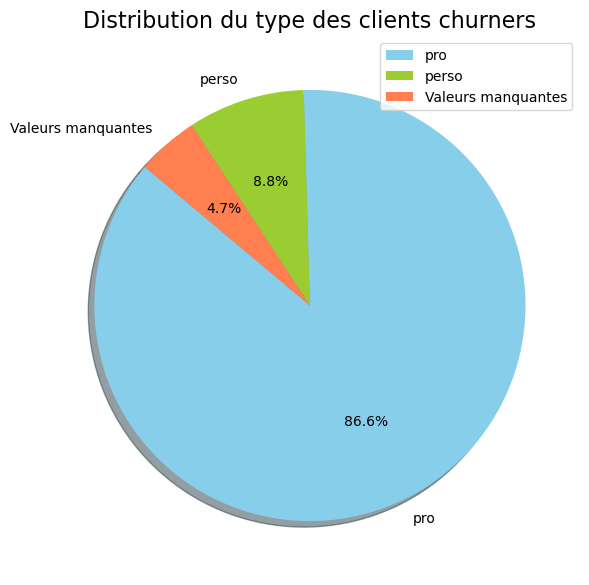

In [56]:
values = attrition["type"].value_counts()
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'lightgreen', 'blue', 'pink', 'darkgreen', 'yellow','grey','red','purple']
plt.figure(figsize=(10,7))
plt.pie(values, labels = values.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution du type des clients churners', fontsize=16)
plt.legend(values.index, loc="best")
plt.show()

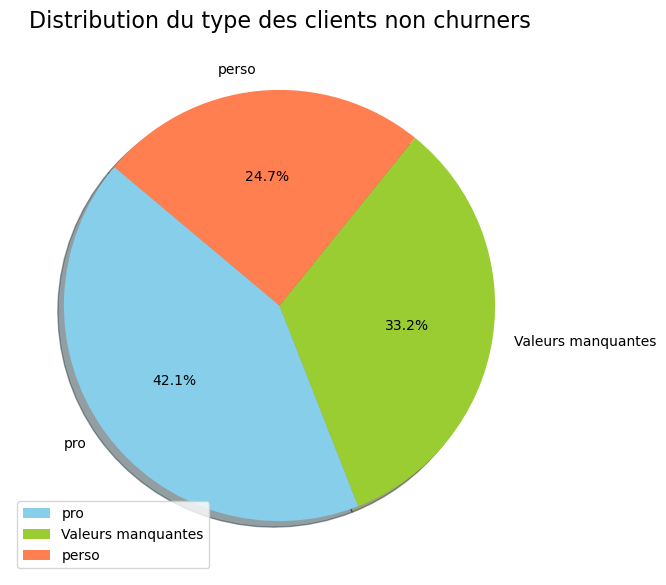

In [57]:
values = not_churn["type"].value_counts()
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'lightgreen', 'blue', 'pink', 'darkgreen', 'yellow','grey','red','purple']
plt.figure(figsize=(10,7))
plt.pie(values, labels = values.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution du type des clients non churners', fontsize=16)
plt.legend(values.index, loc="best")
plt.show()

Les churners sont davantage titulaires de comptes pro alors que la répartition du type de clients chez les non churners semble plutôt uniforme.

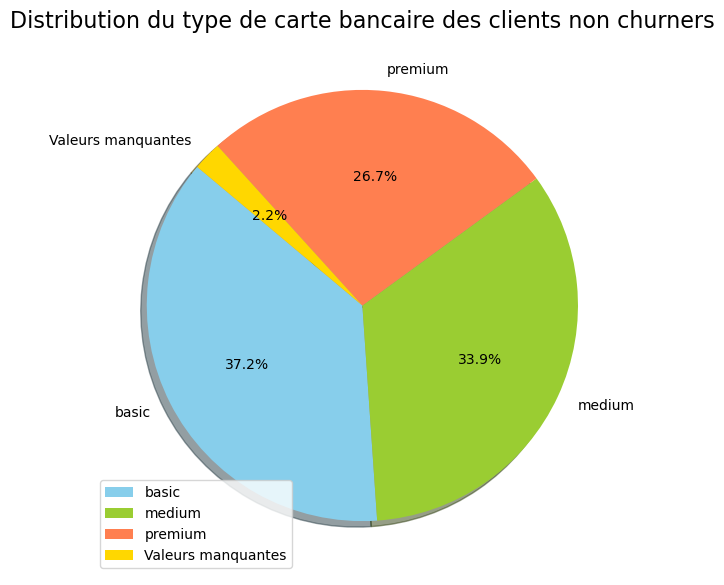

In [58]:
values = not_churn["cartes_bancaires"].value_counts()
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'lightgreen', 'blue', 'pink', 'darkgreen', 'yellow','grey','red','purple']
plt.figure(figsize=(10,7))
plt.pie(values, labels = values.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution du type de carte bancaire des clients non churners', fontsize=16)
plt.legend(values.index, loc="best")
plt.show()

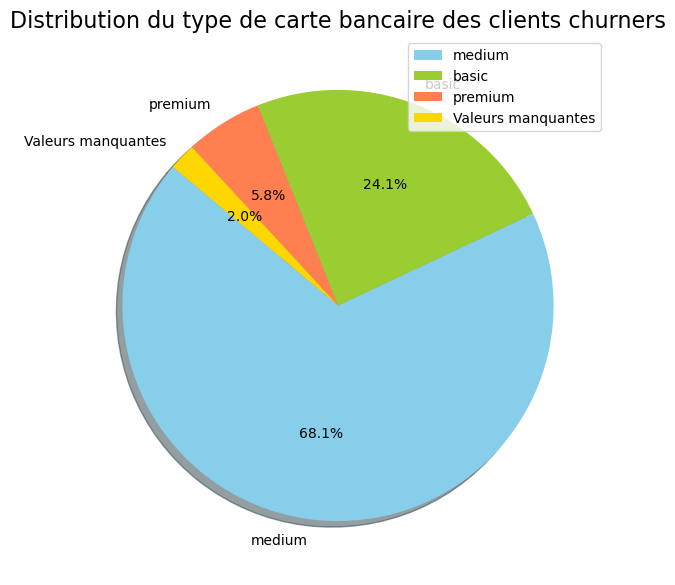

In [59]:
values = attrition["cartes_bancaires"].value_counts()
colors = ['skyblue', 'yellowgreen', 'coral', 'gold', 'lightgreen', 'blue', 'pink', 'darkgreen', 'yellow','grey','red','purple']
plt.figure(figsize=(10,7))
plt.pie(values, labels = values.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution du type de carte bancaire des clients churners', fontsize=16)
plt.legend(values.index, loc="best")
plt.show()

Les churners sont davantage titulaires d'une carte bancaire medium alors que la répartition des types de carte bancaire chez les non churners semble plutôt uniforme.

## Feature Reduction

Divisons notre jeu de données en deux, X qui comporte toutes les variables et y qui comporte la target

In [60]:
df.head()

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,espace_client,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,Non,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182745,5945.077267,10803.089959,13030.928518,16070.855640,17019.439852,22021.785596,21216.423900,23817.283384,24696.468636,-5.206176,29133.894497,27300.071162,26686.065056,29058.920542,30081.575645,34737.732143,35668.424115,42088.923198,42764.084114,1169.512733,1476.735096,2906.612116,4238.286461,6541.289876,5604.843020,8529.610222,6698.675290,8299.637103,8584.519863,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,Non,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,Valeurs manquantes,non,sms,24.10,1734.65,53.0,B1,13256.481090,13857.639282,16921.648902,15994.602590,19860.270780,21737.139931,24324.244241,27392.121666,29288.212735,31119.430165,32536.150958,33491.895175,36037.986828,37906.966495,37065.723883,36662.943135,35995.908243,38504.550415,39879.461696,40351.659648,4040.767255,2893.438448,4522.323311,3289.390612,8409.097755,5939.488953,6615.523133,8423.928612,9664.847859,12811.297554,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,Non,non,non,3.0,oui,Valeurs manquantes,medium,non,non,oui,non,non,non,pro,oui,sms,73.60,232.50,41.0,B2,6485.760225,8854.292447,14631.403255,16403.253266,20053.910352,24404.311456,-2841.348341,-904.308834,28995.145157,31381.332311,34524.328158,37696.137418,40010.389451,39991.336181,42066.099905,46159.092725,46548.328134,49017.799992,50879.800091,50811.414357,641.888116,2194.386006,4719.557270,5592.923372,6652.559765,11578.741807,10784.182742,10408.668590,11426.817452,11686.025962,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,Oui,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,Valeurs manquantes,oui,pro,oui,sms,112.90,8061.50,44.0,C4,3023.518886,3657.280381,3583.864370,7048.335851,10851.522505,13233.449469,17043.445440,17315.324866,18409.009200,20992.136261,25680.971636,26021.839063,28987.451966,28467.733523,30863.437099,6506.306202,35443.442964,42466.157213,47617.669527,50441.094534,846.588009,300.647893,-111.756762,623.554669,1411.534141,2919.154899,4837.868424,6297.571985,4694.966744,8601.779273,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,Non,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,281.00,32.0,B2,5108.994106,4922.134385,5619.387384,5967.906772,11720.904970,15561.132418,14934.624990,16295.563660,18983.711353,20997.917940,23264.257596,21750.759870,19947.127129,20916.130056,21685.913416,23620.334323,24778.901653,22870.646400,25475.278671,28725.910656,533.782193,977.257244,782.571668,1830.376484,2025.910611,2696.413807,2883.741954,4206.610511,4990.114457,7081.966623,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


In [61]:
y = df['churn']
y = y.map({'oui': 1, 'non': 0})

On va cherche à numériser les variables catégoriques afin de mesurer leur coefficient de corrélation avec la target.

In [62]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['Float64']).columns
df = pd.get_dummies(df, columns = catcols)
print('New Number of Features: %d'%(df.shape[1])) 

New Number of Features: 127


Normalisons les données avec le MinMax Scaler afin de mettre en place une échelle commune.

In [63]:
#for col in df[floatcols]:
    #df[col] = MinMaxScaler().fit_transform(df[[col]])
    
#for col in df[intcols]:
    #df[col] = MinMaxScaler().fit_transform(df[[col]])

Créons la matrice de corrélation du jeu de donnée afin d'avoir un premier aperçu des varibales corrélées avec notre target.

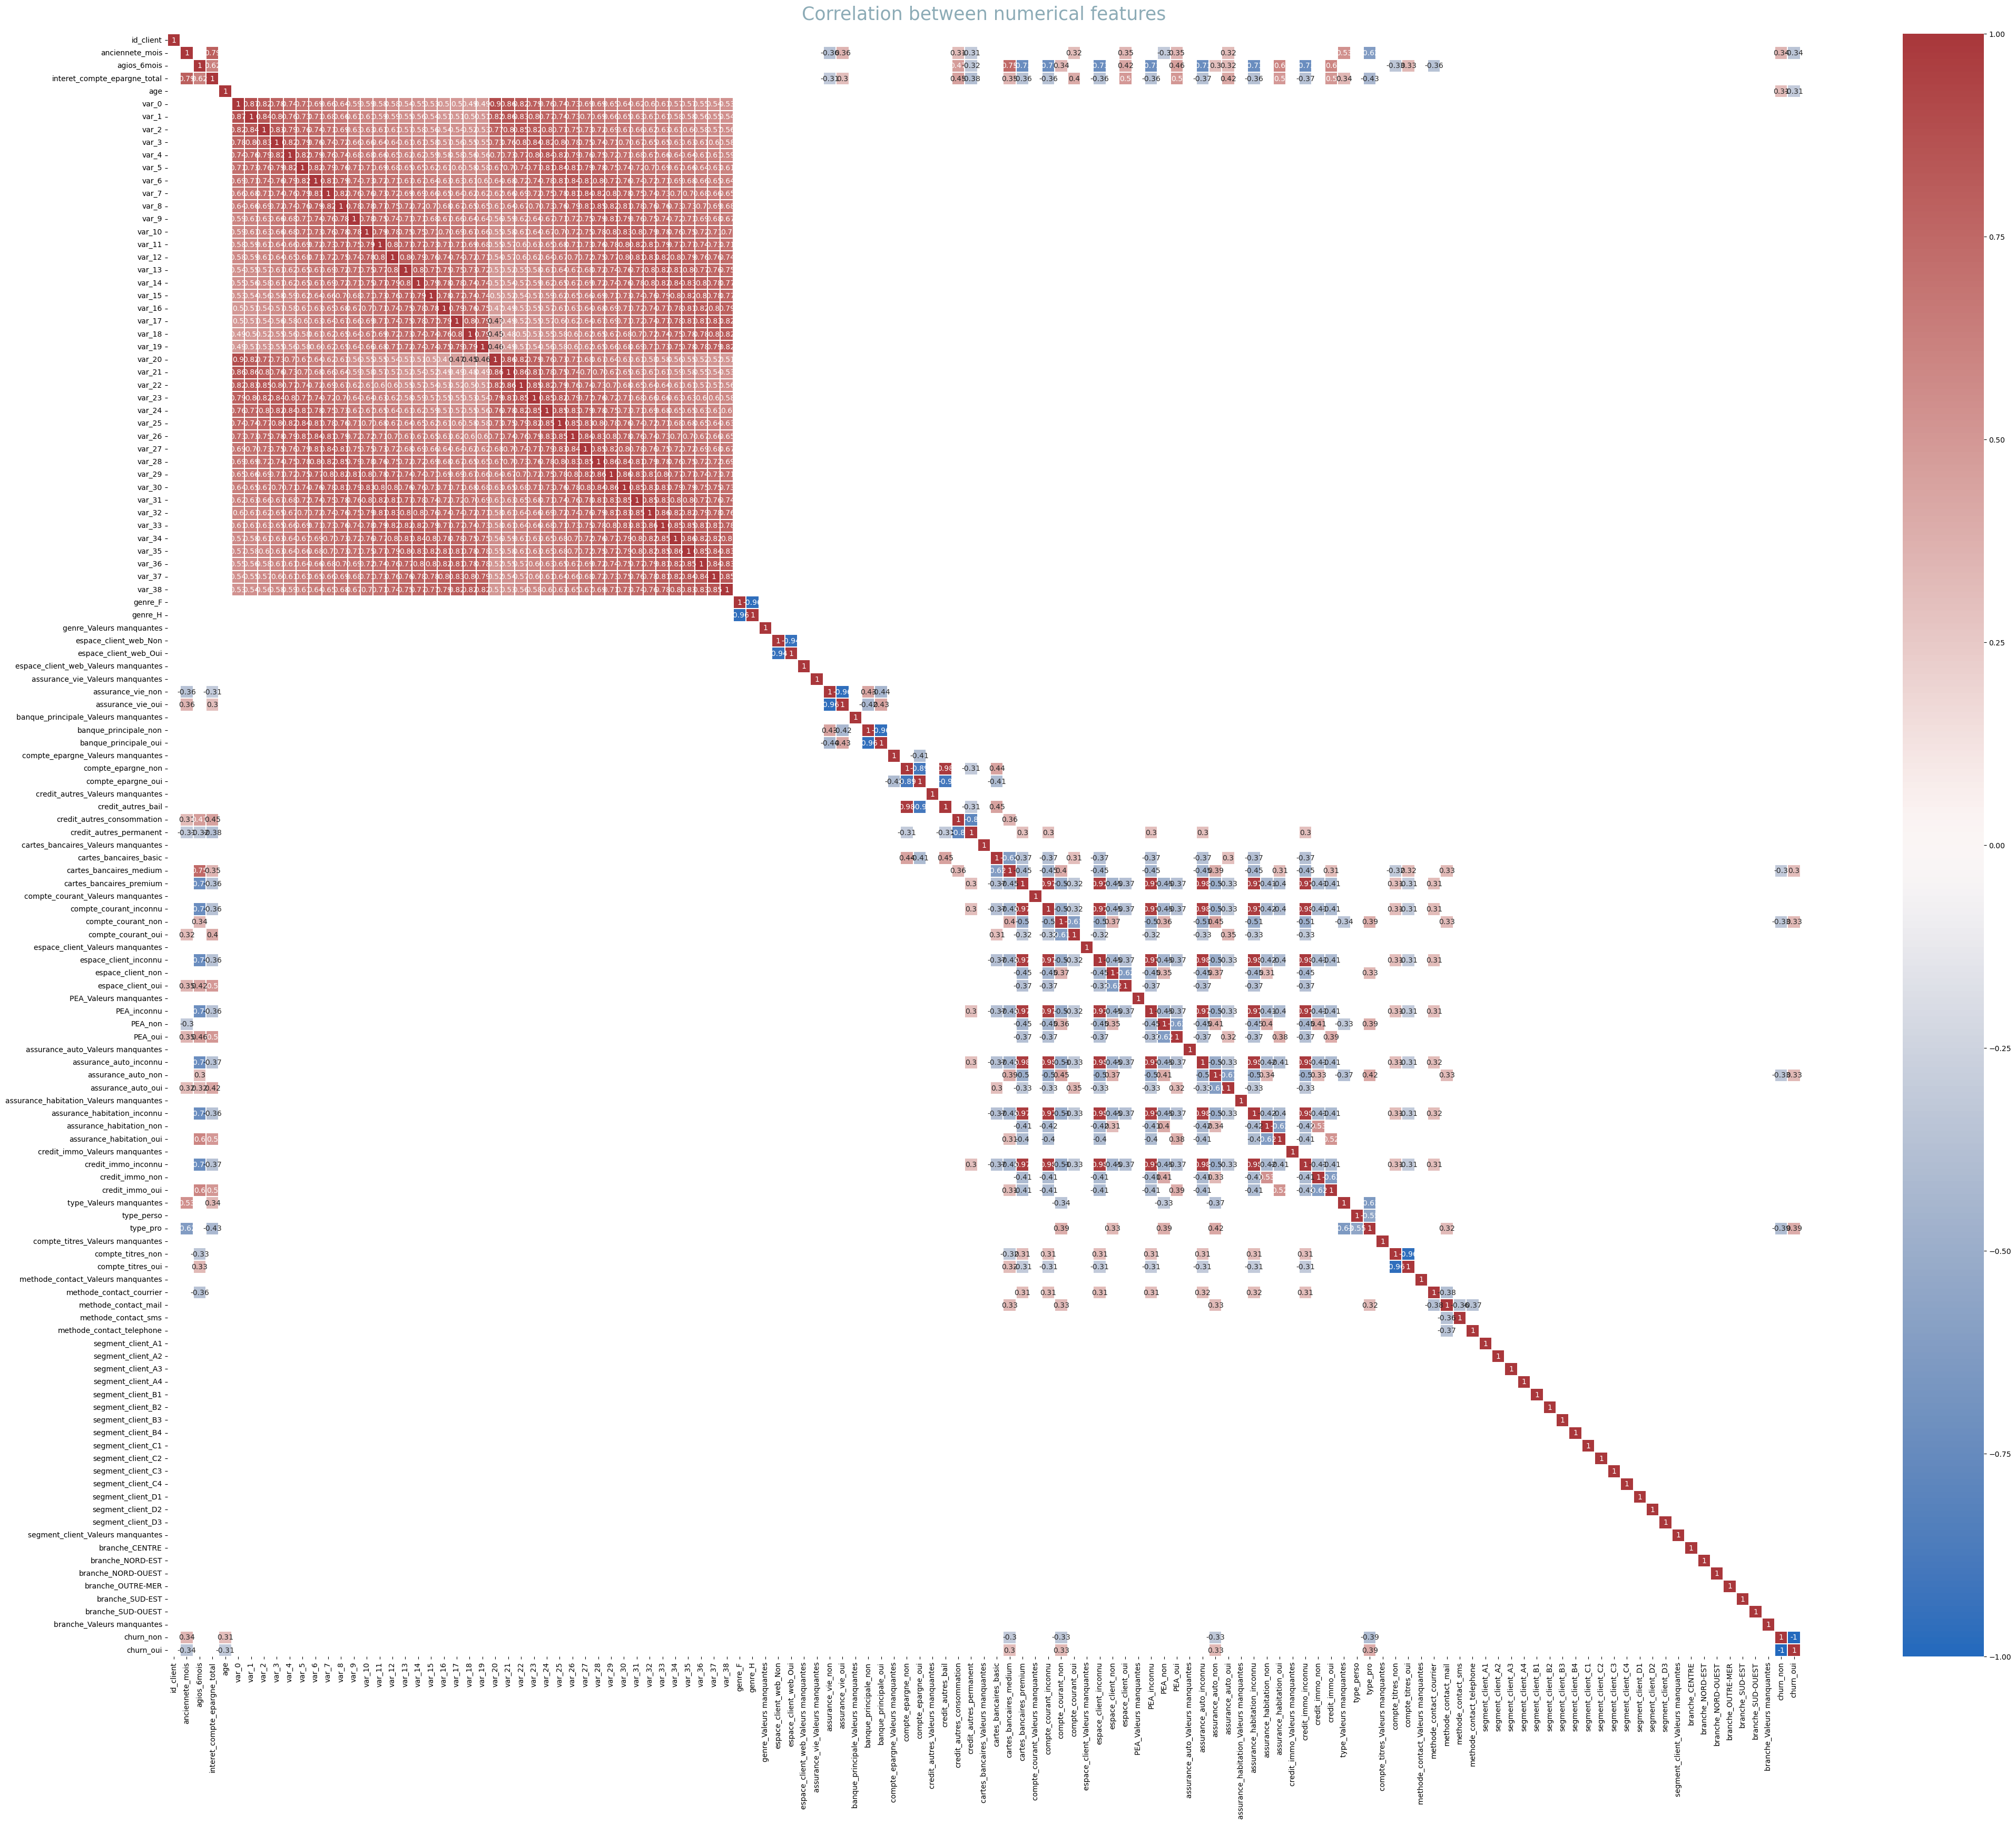

In [64]:
corr=df.corr()[abs(df.corr()) > 0.3] #on part du principe que deux varibales sont au moins faiblement corrélées lorsqu'elles ont un coefficient de corrélation supérieur à 0.3 ou inférieur à -0.3
plt.figure(figsize=[50,40])
plt.title("Correlation between numerical features", size = 25, pad = 20, color = '#8cabb6')
sns.heatmap(corr,cmap='vlag', linewidths=0.1, annot=True, linecolor='white')
plt.show()

Ici (en zoomant un peu), on s'aperçoit que les varibales ancienneté_mois, age, carte_bancaire_medium, compte_courant_non, assurance_auto_non et type_pro sont faiblement corrélés à churn. Calculons le coefficient de corrélation de ces variables avec notre target.

In [65]:
print("Correlation Coefficient of all the Features")
corr = df.corr()
corr.sort_values(["churn_oui"], ascending = False, inplace = True)
correlations = corr.churn_oui
a = correlations[correlations > 0.3]
b = correlations[correlations < -0.3]
top_corr_features = a.append(b)
top_corr_features

Correlation Coefficient of all the Features


C:\Users\loick\AppData\Local\Temp\ipykernel_30468\4198666504.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_corr_features = a.append(b)


churn_oui                  1.000000
type_pro                   0.394267
assurance_auto_non         0.334767
compte_courant_non         0.330946
cartes_bancaires_medium    0.304758
age                       -0.310177
anciennete_mois           -0.344991
churn_non                 -1.000000
Name: churn_oui, dtype: float64

Nous allons donc utiliser en priorité les variables : type_pro, assurance_auto_non, compte_courant_non, cartes_bancaires_medium, age, et ancienneté_mois pour poursuivre nos analyses.

Feature selection

créer une variable aléatoire pour référence de la feature importance

C:\Users\loick\AppData\Local\Temp\ipykernel_30468\3794155144.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(best_features)


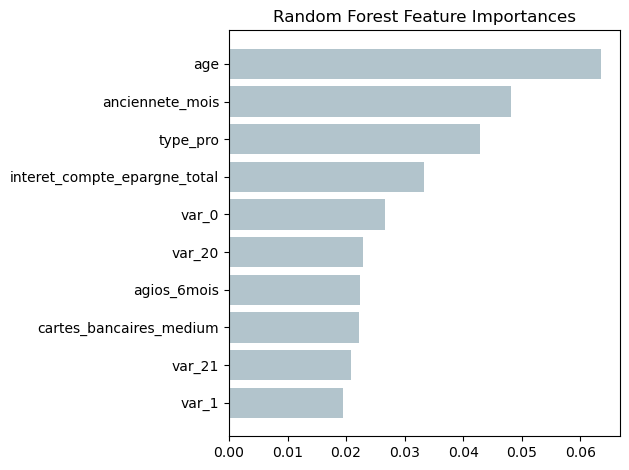

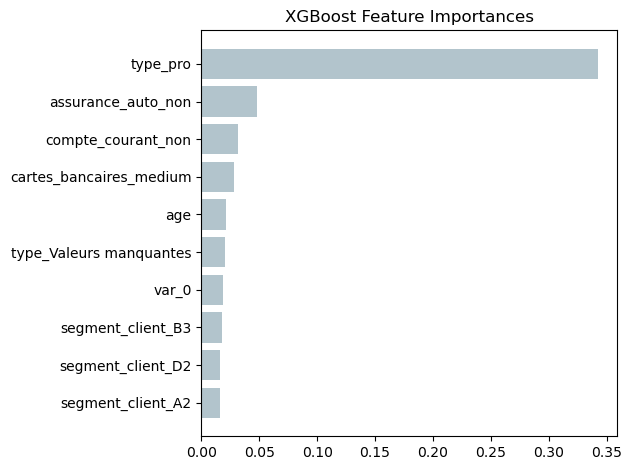

                                     feature  importance
4                                        age    4.979115
5                                      var_0    3.619599
115                        segment_client_D2    3.028166
108                        segment_client_B3    2.811046
109                        segment_client_B4    2.767273
103                        segment_client_A2    2.667141
104                        segment_client_A3    2.633516
116                        segment_client_D3    2.596998
25                                    var_20    2.096184
1                            anciennete_mois    1.887559
106                        segment_client_B1    1.779480
110                        segment_client_C1    1.738330
107                        segment_client_B2    1.735580
112                        segment_client_C3    1.720378
105                        segment_client_A4    1.653459
111                        segment_client_C2    1.653273
102                        segm

C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def plot_importances(model, model_name, features_to_plot, feature_names):
    #fit model and performances
    model.fit(X,y)
    importances = model.feature_importances_
    
    # sort and rank importances
    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    values = importances[indices][-features_to_plot:]
    
    # plot a graph
    y_ticks = np.arange(0, features_to_plot)
    fig, ax = plt.subplots()
    ax.barh(y_ticks, values, color = '#b2c4cc')
    ax.set_yticklabels(best_features)
    ax.set_yticks(y_ticks)
    ax.set_title("%s Feature Importances"%(model_name))
    fig.tight_layout()
    plt.show()
    
def best_features(model, features_to_plot, feature_names):
    # get list of best features 
    model.fit(df,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

feature_names = list(df.columns)

model1 = RandomForestClassifier(random_state = 1234) #ne pas oublier de fixer de nombre max d'itérations
plot_importances(model1, 'Random Forest', 10, feature_names)

model2 = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
plot_importances(model2, 'XGBoost', 10, feature_names)

model3 = LogisticRegression(random_state=1)
model3.fit(X_train, y_train)
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(model3.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

In [67]:
f_selector = SelectKBest(f_classif, k = 10)
f_selector.fit_transform(X, y)
f_selector_best = f_selector.get_feature_names_out()
print(f_selector_best)

['anciennete_mois' 'age' 'var_0' 'cartes_bancaires_medium'
 'compte_courant_non' 'espace_client_non' 'assurance_auto_non'
 'type_Valeurs manquantes' 'type_pro' 'methode_contact_mail']


In [68]:
forest_best = list(best_features(model1, 10, feature_names))
XG_best = list(best_features(model2, 10, feature_names))
RLogistic_best = feature_importance.nlargest(10, 'importance')
RLogistic_best = RLogistic_best['feature'].tolist()
f_selector_best = list(f_selector_best)

In [69]:
best_features_overall = forest_best + f_selector_best + XG_best + RLogistic_best

# create a dictionary with the number of times features appear 
count_best_features = dict(Counter(best_features_overall))

# list of the features without any repeatitions
features_no_repeats = list(dict.fromkeys(best_features_overall))

display(count_best_features)

{'var_20': 2,
 'compte_courant_non': 2,
 'cartes_bancaires_medium': 2,
 'assurance_auto_non': 2,
 'interet_compte_epargne_total': 1,
 'anciennete_mois': 3,
 'age': 3,
 'type_pro': 2,
 'churn_oui': 1,
 'churn_non': 2,
 'var_0': 2,
 'espace_client_non': 1,
 'type_Valeurs manquantes': 1,
 'methode_contact_mail': 1,
 'var_35': 1,
 'var_34': 1,
 'var_33': 1,
 'var_32': 1,
 'var_31': 1,
 'var_30': 1,
 'var_29': 1,
 'var_28': 1,
 'credit_autres_permanent': 1,
 'segment_client_D2': 1,
 'segment_client_B3': 1,
 'segment_client_B4': 1,
 'segment_client_A2': 1,
 'segment_client_A3': 1,
 'segment_client_D3': 1}

In [70]:
def get_features(threshold):
    # remove features below a certain number of appearances
    chosen_features = []
    for i in features_no_repeats:
        if count_best_features[i] > threshold:
            chosen_features.append(i)
    return chosen_features
chosen_features = get_features(1)
chosen_features

['var_20',
 'compte_courant_non',
 'cartes_bancaires_medium',
 'assurance_auto_non',
 'anciennete_mois',
 'age',
 'type_pro',
 'churn_non',
 'var_0']

In [71]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

model1 = RandomForestClassifier(random_state = 1234)
model2 = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model3 = LogisticRegression(random_state=1)

model1.fit(train_x,train_y)
model1.score(test_x, test_y)
pred_test = model1.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
    
print(con,f1,test_acc)

[[964  72]
 [153 220]] 0.6616541353383459 0.8403122782114976


Utiliser ML flow pour gérer les différents modèles

In [72]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

model1 = RandomForestClassifier(random_state = 1234)
model2 = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model3 = LogisticRegression(random_state=1)

model2.fit(train_x,train_y)
model2.score(test_x, test_y)
pred_test = model2.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
    
print(con,f1,test_acc)

[[969  67]
 [111 262]] 0.7464387464387465 0.8736692689850958


In [47]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

model1 = RandomForestClassifier(random_state = 1234)
model2 = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model3 = LogisticRegression(random_state=1)

model3.fit(train_x,train_y)
model3.score(test_x, test_y)
pred_test = model3.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
    
print(con,f1,test_acc)

[[970  66]
 [316  57]] 0.22983870967741934 0.7288857345635202


C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


find best model

tenter le stacking de modèles : Plutôt que de choisir un seul modèle, utilisez une combinaison de plusieurs modèles pour améliorer la performance. Le stacking consiste à entraîner plusieurs modèles de base et à utiliser leurs prédictions comme features dans un modèle méta.

La régression logistique ne permforme mieux qu'avec un minmaxscaling. Maintenant les modèles random forest et xgboost sont très sensibles au surraprentissage donc il est nécesssaire de bien calibrer leurs hyperparamètres.

Hyperparameters tuning

In [74]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]
}

logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(train_x, train_y)
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\loick\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters:  {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}


In [75]:
param_grid = {
   'n_estimators': [100, 200, 300, 400, 500],
  'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

grid_search.fit(train_x, train_y)
best_params = grid_search.best_params_

print("Meilleurs paramètres : ", best_params)

KeyboardInterrupt: 

In [49]:
#param_grid = {
 #   'n_estimators': [100, 200, 300, 400, 500],
 #   'learning_rate': [0.01, 0.1, 0.2, 0.3],
 #   'max_depth': [3, 4, 5, 6, 8, 10],
 #   'subsample': [0.5, 0.7, 1.0],
 #   'colsample_bytree': [0.5, 0.7, 1.0]
#}

# Créer un modèle de base
#xgb = XGBClassifier(use_label_encoder=False)

# Instancier le modèle de recherche sur grille
#grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

# Ajuster la recherche sur grille aux données
#grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
#best_params = grid_search.best_params_

#print("Meilleurs paramètres : ", best_params)

Application des modèles

In [76]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 20, random_state = 42)
chosen_features = get_features(2)
X_new = X[chosen_features]

train_x, test_x, train_y, test_y = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
    
forest.fit(train_x,train_y)
forest.score(test_x, test_y)
pred_test = forest.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
precision = metrics.precision_score(test_y, pred_test)
recall = metrics.recall_score(test_y, pred_test)
roc = metrics.roc_auc_score(test_y, pred_test)

print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print('ROC Score', roc)
print(con)


Accuracy Score 0.7324343506032647
Precision 0.4938650306748466
Recall 0.4316353887399464
F1-Score 0.46065808297567956
ROC Score 0.6361844897367687
[[871 165]
 [212 161]]


In [55]:
regression = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', solver = 'saga')
chosen_features = get_features(2)
X_new = X[chosen_features]

train_x, test_x, train_y, test_y = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
    
regression.fit(train_x,train_y)
regression.score(test_x, test_y)
pred_test = regression.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
precision = metrics.precision_score(test_y, pred_test)
recall = metrics.recall_score(test_y, pred_test)
roc = metrics.roc_auc_score(test_y, pred_test)

print('Accuracy Score', test_acc)
print('Precision', precision)
print('Recall', recall)
print('F1-Score', f1)
print('ROC Score', roc)
print(con)

Accuracy Score 0.8218594748048261
Precision 0.6848484848484848
Recall 0.6058981233243967
F1-Score 0.6429587482219061
ROC Score 0.7527560114691482
[[932 104]
 [147 226]]


In [60]:
if isinstance(test_y, pd.Series):
    test_y = test_y.to_frame()

# Ajouter la colonne pred_test
test_y['pred_test'] = pred_test

test_y.head()

,churn,pred_test
185,0,0
2715,0,0
3825,1,0
1807,1,1
132,0,0


Ajoutons les colonnes de score

In [62]:
probabilities = regression.predict_proba(train_x)
churn_probabilities = probabilities[:, 1]
print(churn_probabilities)

[0.04564088 0.60711671 0.46403924 ... 0.05290927 0.29567912 0.43221985]


In [68]:
train_x.head()

,cartes_bancaires_medium,var_0,type_pro,anciennete_mois,age
2142,0,0.149299,0,0.958333,0.029703
1623,1,0.251868,1,0.013889,0.168317
6074,0,0.099933,1,0.013889,0.158416
1362,0,0.135757,1,0.138889,0.089109
6754,0,0.389845,1,0.152778,0.198020


In [69]:
test_x.head()

,cartes_bancaires_medium,var_0,type_pro,anciennete_mois,age
185,0,0.112381,0,0.013889,0.178218
2715,0,0.083524,1,0.041667,0.188119
3825,0,0.026477,0,0.736111,0.564356
1807,1,0.014082,1,0.208333,0.396040
132,0,0.147164,0,0.472222,0.099010


In [67]:
probabilities_df = pd.DataFrame(probabilities)
churn_probabilities_series = pd.Series(churn_probabilities)
data = pd.concat([train_x,train_y])
data.head()

,cartes_bancaires_medium,var_0,type_pro,anciennete_mois,age,0
2142,0.0,0.149299,0.0,0.958333,0.029703,NaN
1623,1.0,0.251868,1.0,0.013889,0.168317,NaN
6074,0.0,0.099933,1.0,0.013889,0.158416,NaN
1362,0.0,0.135757,1.0,0.138889,0.089109,NaN
6754,0.0,0.389845,1.0,0.152778,0.198020,NaN


Github, FastAPI, Airflow, docker, cloud : étudier comment utiliser plus de ceci